<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 3</h2><br/>
<h1>Introducción a Redes Neuronales y DeepLearning</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.cl <br/>
    <b>Instructor Asistente:</b> Jesús Ortiz jortiz@codingdojo.cl<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Redes neuronales (Neural Networks - NN)

- Las Redes Neuronales son un conjunto de modelos de Machine Learning.
- Estas se inspiran en el funcionamiento neurológico del cerebro humano.
- Las redes neuronales han sido utilizadas en múltiples y diferentes áreas de aplicación

### Ejemplos de aplicaciones Deep Learning

- [DeepMind](https://www.youtube.com/watch?v=V1eYniJ0Rnk)
- [Gaugan2](http://gaugan.org/gaugan2/?text_input=ocean+waves+in+a+beach)
- [YoloV3](https://www.youtube.com/watch?v=MPU2HistivI)
- [QuickDraw](https://quickdraw.withgoogle.com/#)
- [Rock-Paper-Scisors](https://tenso.rs/demos/rock-paper-scissors/)
- Y una laaaarga [lista](https://www.mygreatlearning.com/blog/deep-learning-applications/#deepdreaming)

# Perceptrón

- Es la red neuronal más sencilla cuya base es la TLU (Threshold Logic Unit)
- TLU es una neurona artificial que opera de la siguiente manera
    - Recibe una o varias entradas numéricas $(x_1, x_2, ..., x_n)$
    - Cada entrada es ponderada por un peso $(w_1x_1, w_2x_2, ..., w_nx_n)$
    - Se calcula la suma ponderada de las entradas $z=w_1x_1 + w_2x_2 + ... +w_nx_n $
    - Al resultado de la suma ponderada se le aplica una función escalonada $h_w(x)=\text{step}(z)$. Esta es nuestra predicción
- Al entrenar una neurona, lo que se intenta determinar son los pesos $w$ tales que la predicción $h_w(x)$ sea lo más cercana al valor real

<img src="images/perceptron.png" width="700px">

In [23]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# iris = load_iris()
# X = iris.data[:,(2,3)] # Largo y ancho del pétalo
# y = (iris.target == 0) # Iris setosa?

cancer_data = load_breast_cancer()
X = cancer_data.data
y = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

per = Perceptron()
per.fit(X_train, y_train)
print("Training score:", per.score(X_train, y_train))
print("Test score:", per.score(X_test, y_test))

Training score: 0.9271356783919598
Test score: 0.8830409356725146


# Redes multicapas y Deep Learning

- Es posible conectar múltiples neuronas entre sí tomando la salida de una neurona como la entrada para una o múltiples neuronas adicionales.
- Las conexiones que se producen entre neuronas conforman lo que se llama como **red neuronal**.
- Dependiendo de cuales sean las conexiones entre distintas neuronas, se habla de la **arquitectura** de la red neuronal.
- Las redes neuronales se dividen en **capas**, las cuales se dividen en las siguientes categorías:
    - Capas de entrada (input layers)
    - Capas de salida (output layers)
    - Capas ocultas/intermedias (hidden layers)
- Las redes multicapas están compuestas por una capa de entrada, una o varias capas ocultas y una capa de salida
- Cuando una red multicapa contiene muchas capas ocultas, hablamos de una **Red Neuronal Profunda** (Deep Neural Network - DNN)

<img src="images/dnn.png" width="700px">

- Al igual que en el perceptron, deseamos calcular los pesos $w$ de todas las neuronas tales que la salida esté lo más cercana a los valores esperados. 
- ¿Cómo podemos calcular tantos pesos a la vez? 
    - **R:** Backpropagation (para quienes estén interesados en estudiar más a fondo, pueden buscar el algoritmo de Descenso del Gradiente/Gradient Descent)

# Bibliotecas de Deep Learning

- Actualmente existe una amplia gama de bibliotecas para Deep Learning. 
- Por su facilidad de uso y popularidad, utilizaremos la API de **Keras**, la cual viene incluida dentro de la biblioteca **Tensorflow**.
- Para poder utilizar Keras, es necesario tener previamente instalado Tensorflow (```pip install tensorflow```)

<img src="images/bibliotecas.png" width="700px">

# Creando redes neuronales en Keras

Para crear una red neuronal, debemos
- Definir la arquitectura de la red (modelo y capas)
- Compilar el modelo (selección de optimizados, función de pérdida y métricas)
- Entrenar modelo
- Usar!

In [113]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [114]:
# Ejemplo usando fashion mnist
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Cost",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"] # 10 clases

X_train_full = X_train_full/255.0

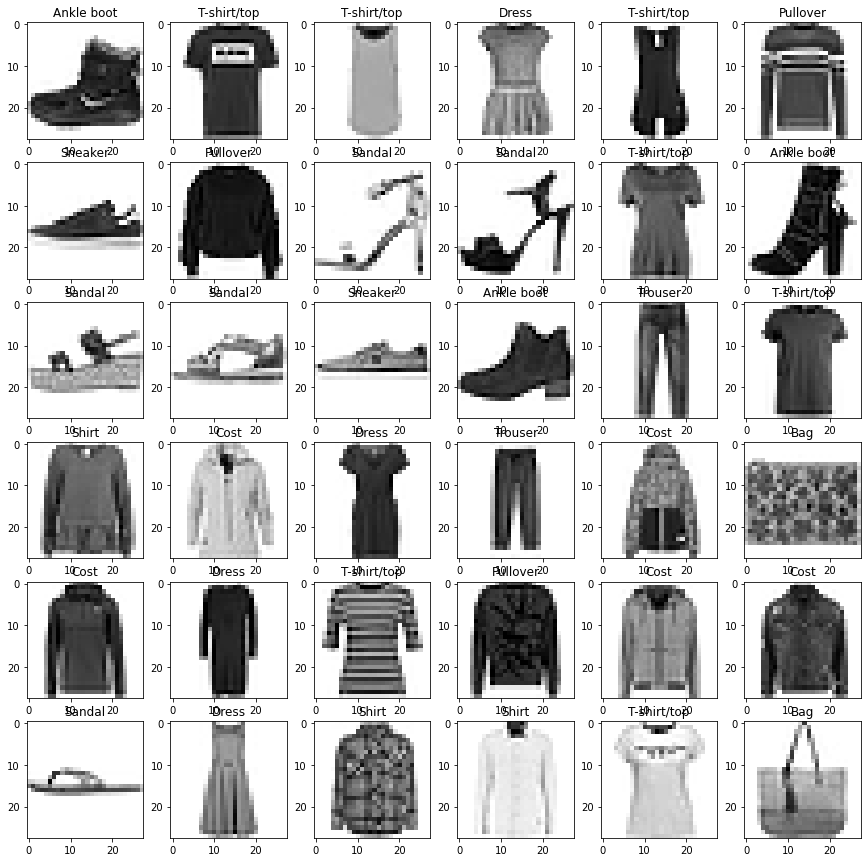

In [115]:

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,15))

for i in range(36):
    ax = fig.add_subplot(6,6,i+1)
    ax.imshow(X_train_full[i], cmap='gist_yarg')
    ax.set_title(class_names[y_train_full[i]])

plt.show()
    

In [116]:
model = tf.keras.models.Sequential() # Modelo secuencial
model.add(tf.keras.layers.Flatten(input_shape=[28, 28])) # Capa de entrada, tiene dimensiones 28x28
model.add(tf.keras.layers.Dense(300, activation='relu')) # Primera capa oculta, salida 300
model.add(tf.keras.layers.Dense(100, activation='relu')) # Segunda capa oculta, salida 100
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Capa de salida, salida 10 (número de clases)

In [117]:
# Red creada
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               235500    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [118]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [119]:
# Utilización de datos de validación y entrenamiento del modelo
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, 
                                                  stratify=y_train_full)

In [120]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
1500/1500 [==============================] - 2s 973us/step - loss: 0.7249 - accuracy: 0.7611 - val_loss: 0.5146 - val_accuracy: 0.8253
Epoch 2/30
1500/1500 [==============================] - 1s 902us/step - loss: 0.4985 - accuracy: 0.8250 - val_loss: 0.4534 - val_accuracy: 0.8443
Epoch 3/30
1500/1500 [==============================] - 1s 885us/step - loss: 0.4538 - accuracy: 0.8414 - val_loss: 0.4326 - val_accuracy: 0.8503
Epoch 4/30
1500/1500 [==============================] - 1s 881us/step - loss: 0.4273 - accuracy: 0.8503 - val_loss: 0.3923 - val_accuracy: 0.8654
Epoch 5/30
1500/1500 [==============================] - 1s 885us/step - loss: 0.4062 - accuracy: 0.8580 - val_loss: 0.3854 - val_accuracy: 0.8691
Epoch 6/30
1500/1500 [==============================] - 1s 887us/step - loss: 0.3905 - accuracy: 0.8621 - val_loss: 0.3737 - val_accuracy: 0.8672
Epoch 7/30
1500/1500 [==============================] - 1s 910us/step - loss: 0.3762 - accuracy: 0.8682 - val_loss: 0.3693 -

In [122]:
X_test = X_test/255.0
score, acc = model.evaluate(X_test, y_test,
                            batch_size=32)
print("Score:", score) # Función de pérdida
print("Accuracy:", acc)

313/313 [==============================] - 0s 867us/step - loss: 0.3321 - accuracy: 0.8798
Score: 0.33213406801223755
Accuracy: 0.879800021648407


In [151]:
dato = 100
prediction = model.predict(X_test)
classes_x=np.argmax(prediction,axis=1)
print("Predicción:", class_names[classes_x[dato]])
print("Clase Real:", class_names[y_test[dato]])

Predicción: Dress
Clase Real: Dress


# Actividad 9

- Utilice nuevamente el dataset California Housing presente en los dataset de Scikit-Learn (enlace [aquí](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)) y utilice los algoritmos de boosting para regresión de datos. 
- Compare los resultados obtenidos para cada algoritmo utilizando distintas métricas

In [38]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.